In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = np.genfromtxt("./data/145224-regression.txt", skip_header=1)
data.shape

(435, 78)

In [3]:
from sklearn import linear_model
from sklearn import neighbors  # KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

(435, 78)


C:\Users\Marcin\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[60594.75149332083, 57091.459632183905, 63312.09665441323, 101180.43943410325, 83158.5470249999, 93559.00232134714, 7126.09395363338, 80720.85133408757, 75835.06461574136]
[166.7321739486117, 159.06436781609196, 176.43506150724542, 219.1305834831704, 158.9451514207994, 198.02704735611206, 65.39829641157148, 182.5473060494826, 178.04756893114944]


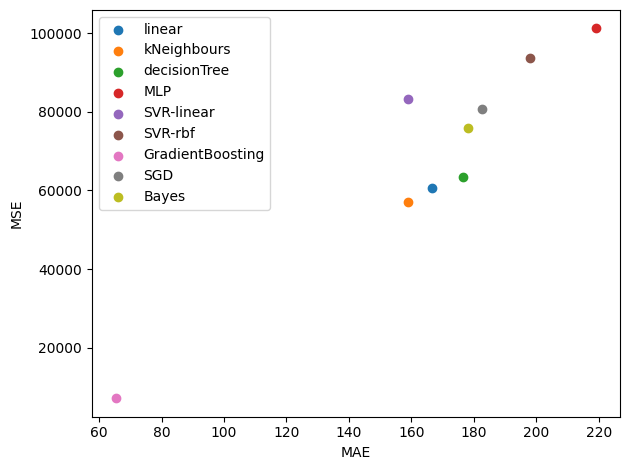

In [8]:
def compare_regressors(data, labels):
    MSE = [mse_data[0] for mse_data in data]
    MAE = [mae_data[1] for mae_data in data]
    # labels = ["lol", "xd", "hehe"]

    print(MSE)
    print(MAE)

    for i in range(len(labels)):
        plt.scatter(MAE[i], MSE[i], label=labels[i])

    plt.xlabel('MAE')
    plt.ylabel('MSE')

    plt.legend()
    plt.tight_layout()

    plt.show()

print(data.shape)
Xregr=data[:,0:-1]
yregr=data[:,-1]
from sklearn.metrics import mean_absolute_error, mean_squared_error  # przykład dla R2 i MAE
print_metrics = lambda regresor,opis,X,y: print(opis,':  MSE=%.1f,'%mean_squared_error(y, regresor.predict(X)), 
                                    ' MAE=%.1f'%mean_absolute_error(y, regresor.predict(X)))
get_metrics = lambda regresor,X,y: [mean_squared_error(y, regresor.predict(X)), mean_absolute_error(y, regresor.predict(X))]

regr_linear = linear_model.LinearRegression()
regr_linear.fit(Xregr, yregr)

regr_kn = neighbors.KNeighborsRegressor()
regr_kn.fit(Xregr, yregr)

regr_dt = DecisionTreeRegressor(max_depth=2)
regr_dt.fit(Xregr, yregr)



regr_mlp = MLPRegressor()
regr_mlp.fit(Xregr, yregr)

regr_svr_linear = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2, kernel="linear"))
# regr_svr_linear = SVR(C=1.0, epsilon=0.2, kernel="linear")
regr_svr_linear.fit(Xregr, yregr)

regr_svr_rbf = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2, kernel="rbf"))
# regr_svr_rbf = SVR(C=1.0, epsilon=0.2, kernel="rbf")
regr_svr_rbf.fit(Xregr, yregr)

regr_gb = GradientBoostingRegressor(random_state=0)
regr_gb.fit(Xregr, yregr)

regr_sgd = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
regr_sgd = SGDRegressor(max_iter=1000, tol=1e-3)
regr_sgd.fit(Xregr, yregr)

regr_bayes = BayesianRidge()
regr_bayes.fit(Xregr, yregr)

regressors = [[regr_linear, "linear"], [regr_kn, "kNeighbours"], [regr_dt, "decisionTree"], [regr_mlp, "MLP"],
               [regr_svr_linear, "SVR-linear"], [regr_svr_rbf, "SVR-rbf"], [regr_gb, "GradientBoosting"], [regr_sgd, "SGD"],
                [regr_bayes, "Bayes"]]
measure = [get_metrics(m[0], Xregr, yregr) for m in regressors]

labels = [label[1] for label in regressors]
compare_regressors(measure, labels)

# a = get_metrics(regr_linear, Xregr, yregr)
# print(a)
# print_metrics(regr_kn,'KNeighborsRegressor',Xregr,yregr)
# print_metrics(regr_gb,'GradientBoostingRegressor',Xregr,yregr)
# print_metrics(regr_sgd,'SGDRegressor',Xregr,yregr)
# print_metrics(regr_bayes,'BayesianRidge',Xregr,yregr)

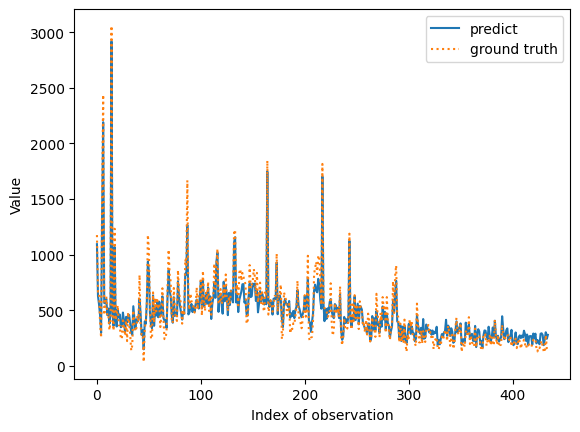

In [21]:
Xregr=data[:,0:-1]
yregr=data[:,-1]
from sklearn.metrics import mean_absolute_error, mean_squared_error  # przykład dla R2 i MAE

regr_gb = GradientBoostingRegressor(random_state=0)
regr_gb.fit(Xregr, yregr)

ypred = regr_gb.predict(Xregr)

# print(Xregr)

plt.plot(list(range(len(ypred))), ypred, label="predict")
plt.plot(list(range(len(ypred))), yregr, ':', label="ground truth")

plt.xlabel("Index of observation")
plt.ylabel("Value")

plt.legend()

plt.show()

In [30]:
names = "dissim	el0	el1	el2	el3	el4	el5	el6	el7	el8	el9	el10	el11	el12	el13	el14	el15	max_el	diff	diffplus	diffminus	std	diff/std**0.2	diff/std**0.6	diff/std**1	diff/std**1.4	diff/std**2	maxmiddle	similarwindow_4.0	similarwindow_4.1	similarwindow_4.2	similarwindow_4.3	stat0	stat1	stat2	stat3	stat4	stat5	stat6	stat7	stat8	stat9	stat10	stat11	stat12	stat13	stat14	stat15	stat16	stat17	stat18	stat19	stat20	stat21	stat22	stat23	stat24	stat25	stat26	stat27	stat28	stat29	stat30	stat31	stat32	stat33	stat34	stat35	stat36	stat37	stat38	stat39	stat40	stat41	stat42	stat43	stat44	class"
names = names.split("\t")
names



['dissim',
 'el0',
 'el1',
 'el2',
 'el3',
 'el4',
 'el5',
 'el6',
 'el7',
 'el8',
 'el9',
 'el10',
 'el11',
 'el12',
 'el13',
 'el14',
 'el15',
 'max_el',
 'diff',
 'diffplus',
 'diffminus',
 'std',
 'diff/std**0.2',
 'diff/std**0.6',
 'diff/std**1',
 'diff/std**1.4',
 'diff/std**2',
 'maxmiddle',
 'similarwindow_4.0',
 'similarwindow_4.1',
 'similarwindow_4.2',
 'similarwindow_4.3',
 'stat0',
 'stat1',
 'stat2',
 'stat3',
 'stat4',
 'stat5',
 'stat6',
 'stat7',
 'stat8',
 'stat9',
 'stat10',
 'stat11',
 'stat12',
 'stat13',
 'stat14',
 'stat15',
 'stat16',
 'stat17',
 'stat18',
 'stat19',
 'stat20',
 'stat21',
 'stat22',
 'stat23',
 'stat24',
 'stat25',
 'stat26',
 'stat27',
 'stat28',
 'stat29',
 'stat30',
 'stat31',
 'stat32',
 'stat33',
 'stat34',
 'stat35',
 'stat36',
 'stat37',
 'stat38',
 'stat39',
 'stat40',
 'stat41',
 'stat42',
 'stat43',
 'stat44',
 'class']

C:\Users\Marcin\AppData\Local\Temp\ipykernel_6236\2803668442.py:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


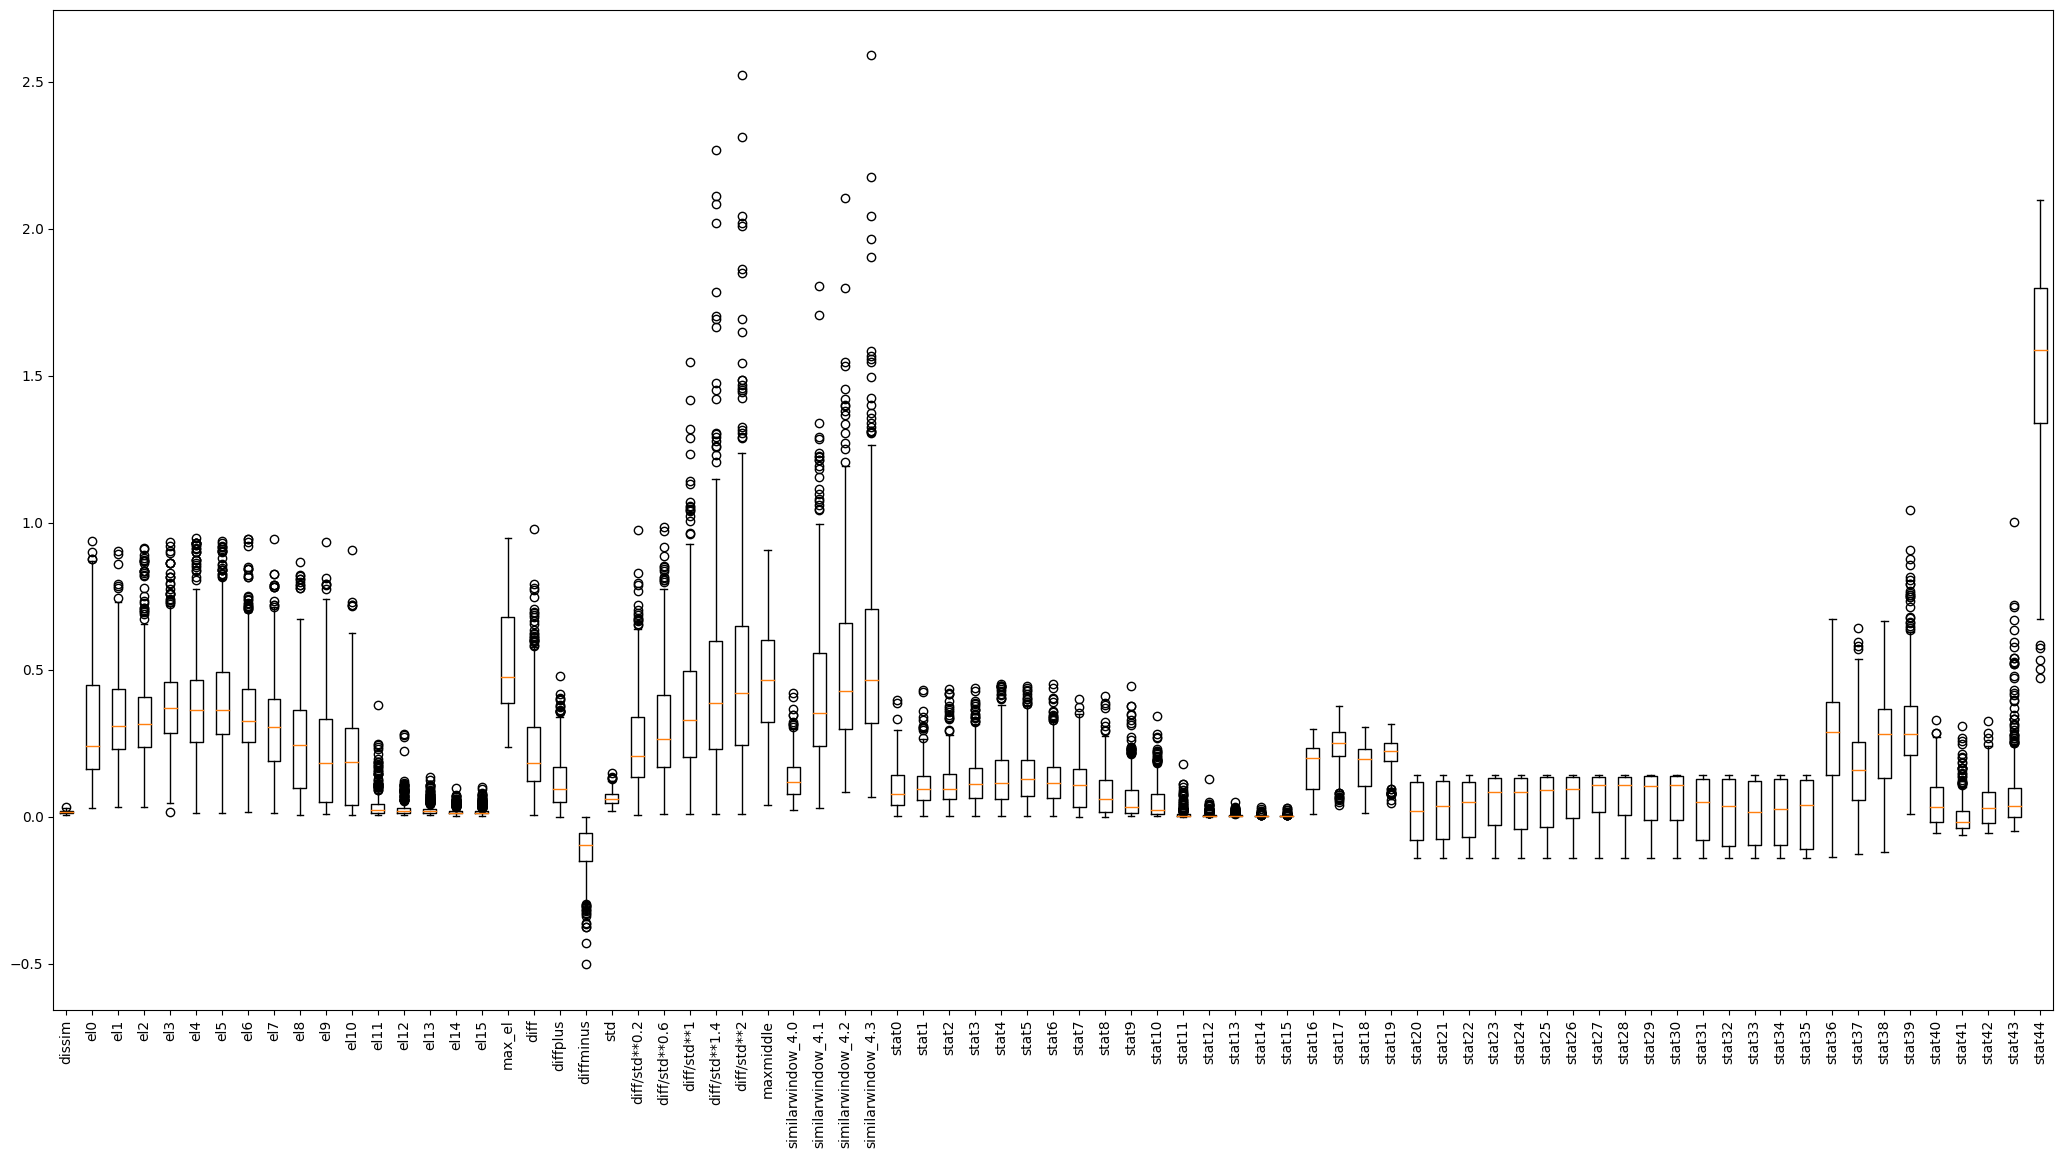

In [32]:
%matplotlib inline
fig = plt.figure(figsize =(20, 10))

ax = fig.add_axes([0, 0, 1, 1])

plt.xticks(rotation=90)
ax.boxplot(data[:, :-1], labels=names[:-1])

plt.tight_layout()

In [28]:
len(names[:-1])

0